In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import math, time, random, datetime
from sklearn.tree import export_graphviz
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier,plot_tree
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
train=pd.read_csv('/kaggle/input/titanic/train.csv')
gender_submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')  


In [3]:
print(len(train))
print(len(test))
print(len(gender_submission))

891
418
418


In [4]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<AxesSubplot:>

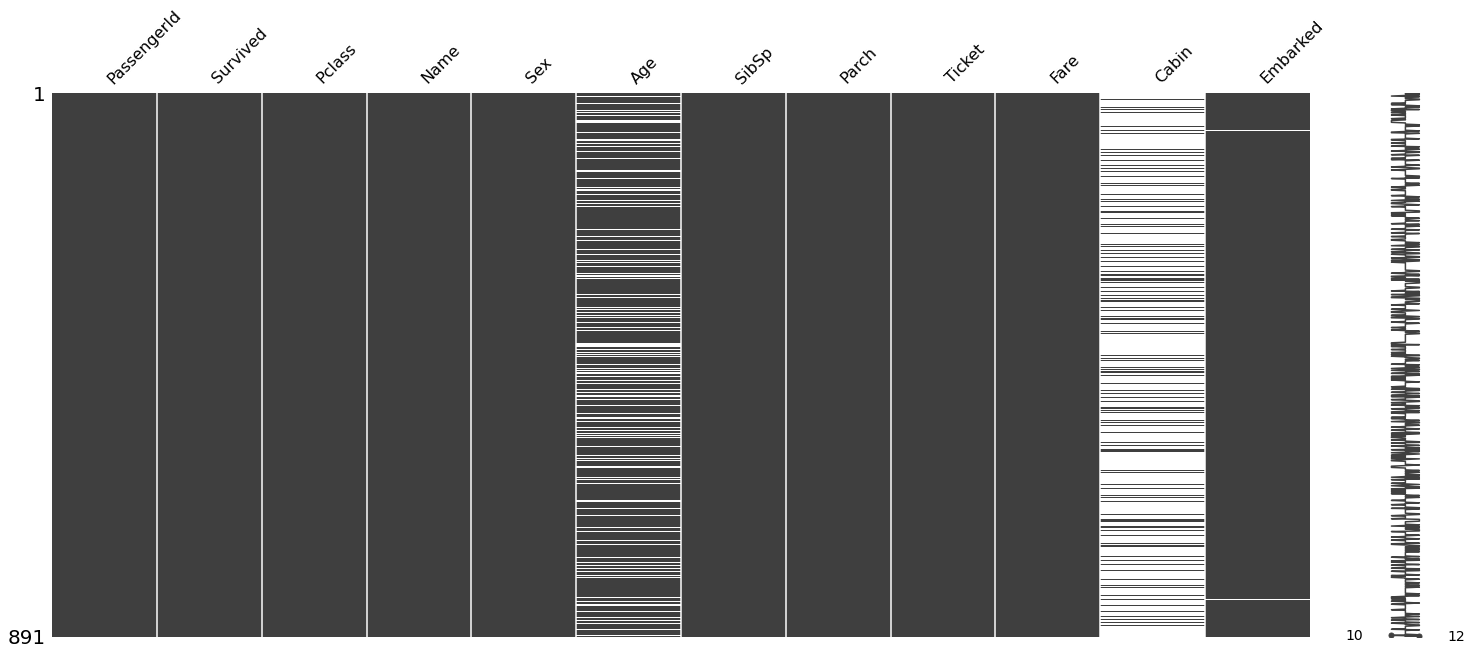

In [5]:
missingno.matrix(train)


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
MLTrain=pd.DataFrame()

0    549
1    342
Name: Survived, dtype: int64

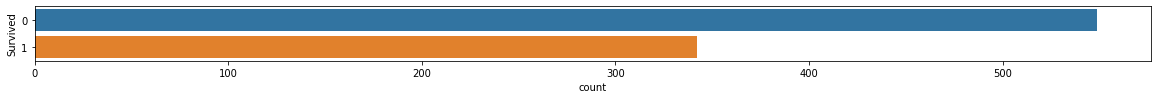

In [8]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
train.Survived.value_counts()


# Pclass

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    549
1    342
Name: Survived, dtype: int64

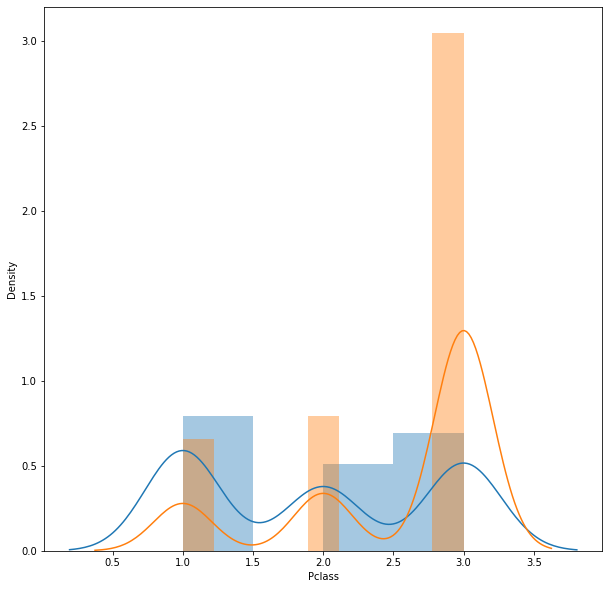

In [9]:
fig = plt.figure(figsize=(10, 10))
#sns.distplot(train['Pclass']);
sns.distplot(train.loc[train['Survived'] == 1]['Pclass'], kde_kws={'label': 'Survived'}, hist_kws={ "linewidth": 3});
sns.distplot(train.loc[train['Survived'] == 0]['Pclass'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});
train.Survived.value_counts()

there is no clear relationship between class and survival

In [10]:
MLTrain["PassengerId"]=train["PassengerId"]
MLTrain["Pclass"]=train["Pclass"]
MLTrain["Survived"]=train["Survived"]

MLTrain.head()

,PassengerId,Pclass,Survived
0,1,3,0
1,2,1,1
2,3,3,1
3,4,1,1
4,5,3,0


# Name 

In [11]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [12]:
train["LastName"]=train["Name"].str.split(',').str[0]
train["repeat"]=0
#train["repeat"].loc[ train["LastName"].is_unique()]=1
train['repeat'] = train.groupby('LastName')['repeat'].transform(lambda x: 1 if x.unique == 0 else x)
train['LastName'].value_counts()
train['repeat'] = train['LastName'].duplicated(keep=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,repeat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,True


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


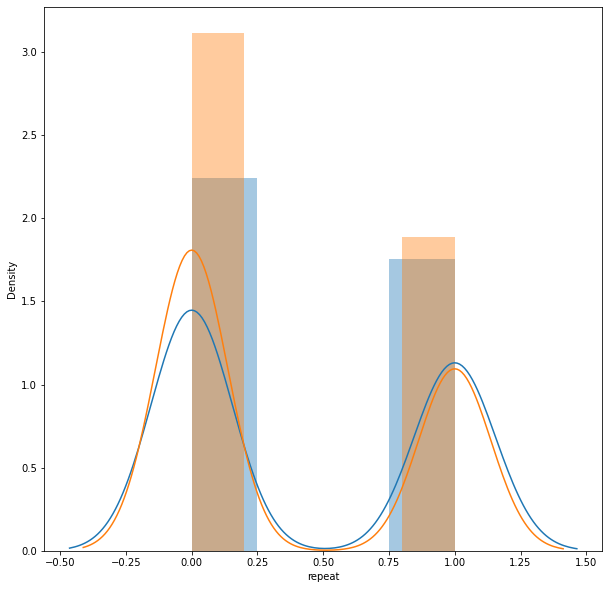

In [13]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train['Survived'] == 1]['repeat'],  kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['repeat'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

In [14]:

MLTrain["LastName_repeat"]=train['repeat']
MLTrain["LastName_repeat"] = MLTrain["LastName_repeat"].astype(int)
MLTrain.head(20)


,PassengerId,Pclass,Survived,LastName_repeat
0,1,3,0,1
1,2,1,1,0
2,3,3,1,0
3,4,1,1,1
4,5,3,0,1
5,6,3,0,1
6,7,1,0,0
7,8,3,0,1
8,9,3,1,1
9,10,2,1,1


# Sex


In [15]:
print(train.head())
train.Sex[train.Sex == 'male'] = 1
train.Sex[train.Sex == 'female'] = 0
train.head()

#sns.distplot(train.loc[train['Survived'] == 1]['Sex'],  kde_kws={'label': 'Survived'});
#sns.distplot(train.loc[train['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked   LastName  repeat  
0      0         A/5 21171   7.2500   NaN        S     Braund    True  
1      0          PC 17599  71.2833   C85        C    Cumings   False  
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   False  
3      0            113803  53.1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,repeat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Futrelle,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Allen,True


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


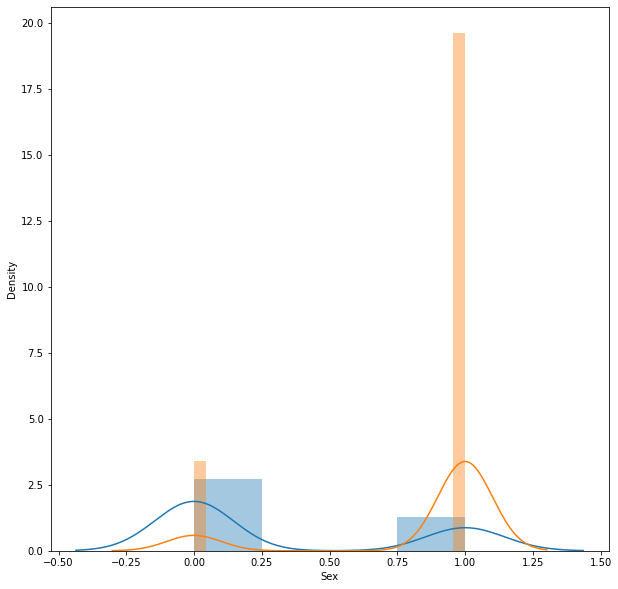

In [16]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train['Survived'] == 1]['Sex'],  kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

male had higher chance of death than female 

In [17]:
MLTrain["Sex"]=train['Sex']


# Age


In [18]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)
train['Age'].isna().sum()
 

177

In [19]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

train['Title'], test['Title'] = [train.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [train, test]]
s=train.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'})
print(train["Age"].isna().sum())
print(test["Age"].isna().sum())
s
#print(test.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'}))

177
86


mean  median  count
Pclass Sex Title                             
1      0   Countess  33.000000    33.0      1
           Dr        49.000000    49.0      1
           Lady      48.000000    48.0      1
           Miss      30.000000    30.0     45
           Mlle      24.000000    24.0      2
           Mme       24.000000    24.0      1
           Mrs       40.882353    41.5     34
       1   Capt      70.000000    70.0      1
           Col       58.000000    58.0      2
           Don       40.000000    40.0      1
           Dr        42.000000    44.0      3
           Jonkheer  38.000000    38.0      1
           Major     48.500000    48.5      2
           Master     5.306667     4.0      3
           Mr        41.580460    40.0     87
           Sir       49.000000    49.0      1
2      0   Miss      22.390625    24.0     32
           Mrs       33.682927    32.0     41
           Ms        28.000000    28.0      1
       1   Dr        38.500000    38.5      2
           Master     2.258889     1.0      9
           Mr        32.768293    31.0     82
           Rev       43.166667    46.5      6
3      0   Miss      16.123188    18.0     69
           Mrs       33.515152    31.0     33
       1   Master     5.350833     4.0     24
           Mr        28.724891    26.0    229

# SibSp

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


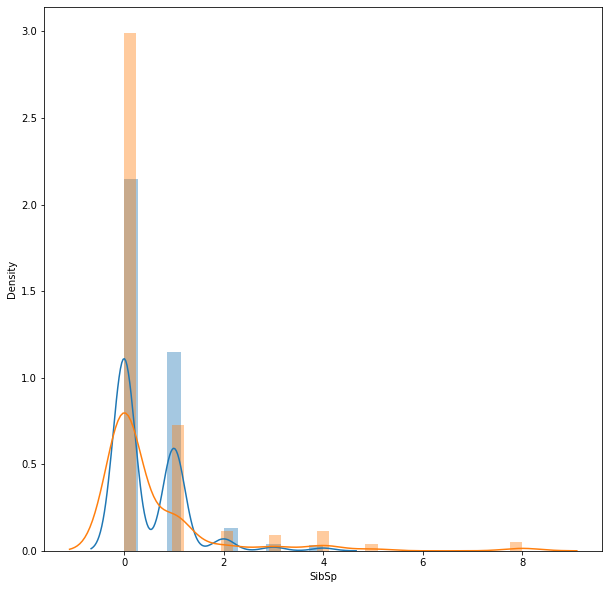

In [20]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train['Survived'] == 1]['SibSp'],  kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

0 siblings and spouse had higher chance of death

In [21]:
MLTrain["SibSp"]=train["SibSp"]

# Parch

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


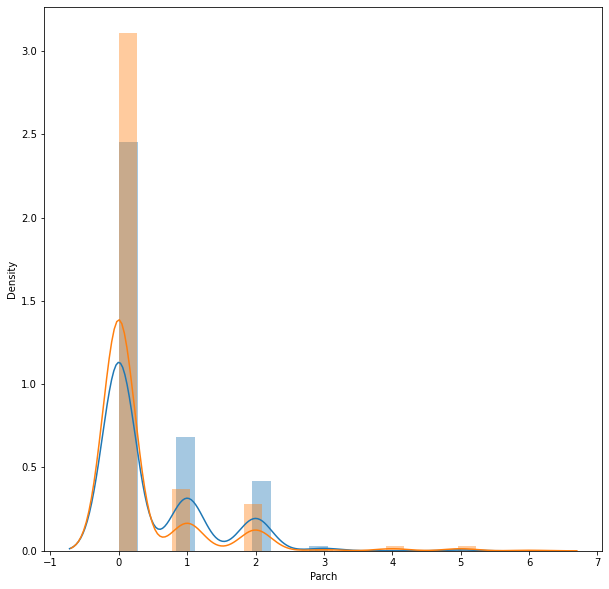

In [22]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train['Survived'] == 1]['Parch'],  kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['Parch'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

Similar pattern as SibSp

In [23]:
MLTrain["Parch"]=train["Parch"]

# Ticket

In [24]:


train.loc[train["Ticket"]=="347088"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,repeat,Title
63,64,0,3,"Skoog, Master. Harald",1,4.0,3,2,347088,27.9,NaN,S,Skoog,True,Master
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,45.0,1,4,347088,27.9,NaN,S,Skoog,True,Mrs
360,361,0,3,"Skoog, Mr. Wilhelm",1,40.0,1,4,347088,27.9,NaN,S,Skoog,True,Mr
634,635,0,3,"Skoog, Miss. Mabel",0,9.0,3,2,347088,27.9,NaN,S,Skoog,True,Miss
642,643,0,3,"Skoog, Miss. Margit Elizabeth",0,2.0,3,2,347088,27.9,NaN,S,Skoog,True,Miss
819,820,0,3,"Skoog, Master. Karl Thorsten",1,10.0,3,2,347088,27.9,NaN,S,Skoog,True,Master


In [25]:
train["Ticket"].value_counts()
s=train.groupby(['Ticket','Name','SibSp','Parch','Survived'])['Survived'].agg({'mean', 'median', 'count'})
#s.sort_values(by=["Ticket"])

In [26]:
train['TicketCount'] = 1
train['TicketCount'] =train.groupby(['Ticket'])['Name'].transform('count')
#this line shows grouped values
#train.groupby(['Ticket',"Name"]).sum()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


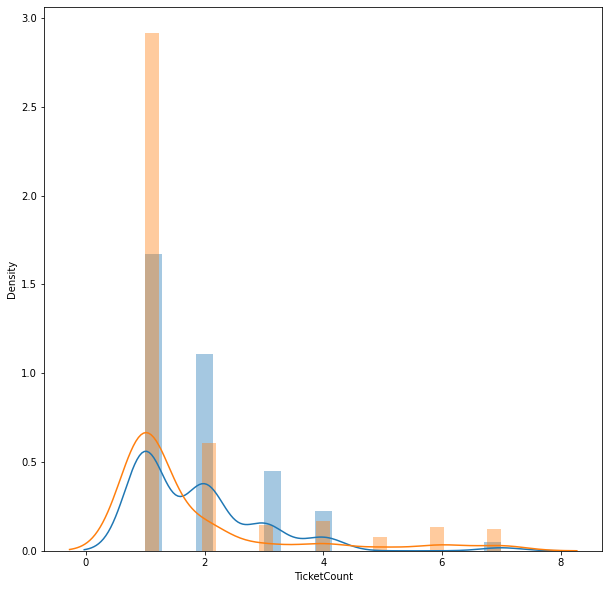

In [27]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train['Survived'] == 1]['TicketCount'],  kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['TicketCount'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

In [28]:
MLTrain["TicketCount"]=train["TicketCount"]

# Fare

In [29]:
# the folowing statement shows Fare was decided by the ticket and seem to be the same values so Ticket values we aded earlier should be sufficient

#train.groupby(['Ticket',"Fare","Name"]).sum()


# Embarked

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


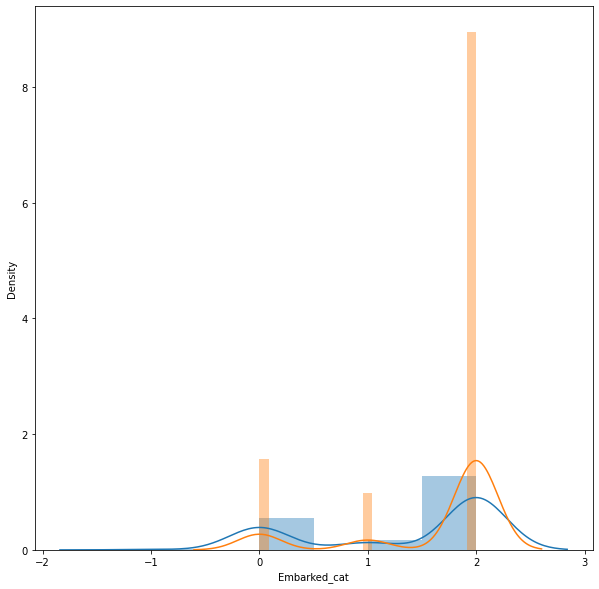

In [30]:
train["Embarked"] = train["Embarked"].astype('category')
train["Embarked_cat"] = train["Embarked"].cat.codes
fig = plt.figure(figsize=(10, 10))

sns.distplot(train.loc[train['Survived'] == 1]['Embarked_cat'],  kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['Embarked_cat'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


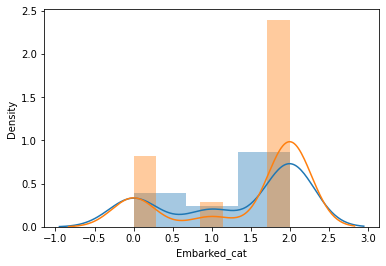

In [31]:
test_tr=pd.DataFrame()
test_tr["Survived"]=gender_submission["Survived"]
test_tr["Embarked"] = test["Embarked"].astype('category')
test_tr["Embarked_cat"] = test_tr["Embarked"].cat.codes
sns.distplot(test_tr.loc[test_tr['Survived'] == 1]['Embarked_cat'],  kde_kws={'label': 'Survived'});
sns.distplot(test_tr.loc[test_tr['Survived'] == 0]['Embarked_cat'], kde_kws={'label': 'Did not survive'}, hist_kws={ "linewidth": 3});

In [32]:
train.groupby(["Embarked"]).sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,repeat,TicketCount,Embarked_cat
Embarked,,,,,,,,,,
C,74820,93,317,4005.92,65,61,10072.2962,66,289,0.0
Q,32178,30,224,786.50,33,13,1022.2543,29,113,77.0
S,289496,217,1514,16312.75,368,266,17439.3988,262,1187,1288.0


In [33]:
train.loc[(train["Embarked"]=="S")&(train["Survived"]==0)].count()

PassengerId     427
Survived        427
Pclass          427
Name            427
Sex             427
Age             353
SibSp           427
Parch           427
Ticket          427
Fare            427
Cabin            49
Embarked        427
LastName        427
repeat          427
Title           427
TicketCount     427
Embarked_cat    427
dtype: int64

In [34]:
MLTrain["Embarked"]=train["Embarked"]

In [35]:
len(MLTrain)

891

In [36]:
MLTrain=MLTrain.dropna()

MLTrain.head()

,PassengerId,Pclass,Survived,LastName_repeat,Sex,SibSp,Parch,TicketCount,Embarked
0,1,3,0,1,1,1,0,1,S
1,2,1,1,0,0,1,0,1,C
2,3,3,1,0,0,0,0,1,S
3,4,1,1,1,0,1,0,2,S
4,5,3,0,1,1,0,0,1,S


# Building Machine Learning Models

In [37]:
#one hot encode column
MLTrain_embarked_one_hot = pd.get_dummies(MLTrain['Embarked'], 
                                     prefix='embarked')

MLTrain_sex_one_hot = pd.get_dummies(MLTrain['Sex'], 
                                prefix='sex')

MLTrain_LastName_repeat_one_hot = pd.get_dummies(MLTrain['LastName_repeat'], 
                                   prefix='LastName_repeat')
MLTrain_plcass_one_hot = pd.get_dummies(MLTrain['Pclass'], 
                                   prefix='pclass')
MLTrain_plcass_one_hot = pd.get_dummies(MLTrain['Pclass'], 
                                   prefix='pclass')

In [38]:
# Combine the one hot encoded columns with df_con_enc
MLTrain_con_enc = pd.concat([MLTrain, 
                        MLTrain_embarked_one_hot, 
                        MLTrain_sex_one_hot, 
                        MLTrain_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
MLTrain_con_enc = MLTrain_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)#=MLTrain.apply(LabelEncoder().fit_transform)


In [39]:
MLTrain_con_enc.head(20)

,PassengerId,Survived,LastName_repeat,SibSp,Parch,TicketCount,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,1,1,0,1,0,0,1,0,1,0,0,1
1,2,1,0,1,0,1,1,0,0,1,0,1,0,0
2,3,1,0,0,0,1,0,0,1,1,0,0,0,1
3,4,1,1,1,0,2,0,0,1,1,0,1,0,0
4,5,0,1,0,0,1,0,0,1,0,1,0,0,1
5,6,0,1,0,0,1,0,1,0,0,1,0,0,1
6,7,0,0,0,0,1,0,0,1,0,1,1,0,0
7,8,0,1,3,1,4,0,0,1,0,1,0,0,1
8,9,1,1,0,2,3,0,0,1,1,0,0,0,1
9,10,1,1,1,0,2,1,0,0,1,0,0,1,0


In [40]:
# Split the dataframe into data and labels
X_train = MLTrain_con_enc.drop('Survived', axis=1) # data
y_train = MLTrain_con_enc.Survived # labels

In [41]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv,model

# Logistic Regression

In [42]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log,model = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.64
Accuracy CV 10-Fold: 78.85
Running Time: 0:00:01.808437


# Decision Tree

Accuracy: 80.31
Accuracy CV 10-Fold: 79.19
Running Time: 0:00:01.808437


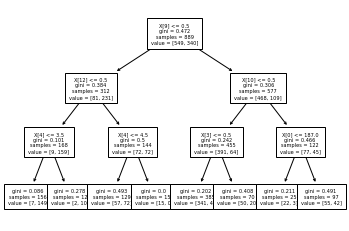

In [43]:
train_pred_log, acc_log, acc_cv_log,model = fit_ml_algo(DecisionTreeClassifier(max_depth=3), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
plot_tree(model,fontsize=5)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

In [44]:
test["LastName"]=test["Name"].str.split(',').str[0]
test["repeat"]=0
#train["repeat"].loc[ train["LastName"].is_unique()]=1
test['repeat'] = test.groupby('LastName')['repeat'].transform(lambda x: 1 if x.unique == 0 else x)
test['LastName'].value_counts()
test['LastName_repeat'] = test['LastName'].duplicated(keep=False)
test["LastName_repeat"] = test["LastName_repeat"].astype(int)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,repeat,LastName_repeat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Kelly,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Wilkes,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Miss,Myles,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mrs,Wirz,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mr,Hirvonen,0,0


In [45]:
test.Sex[test.Sex == 'male'] = 1
test.Sex[test.Sex == 'female'] = 0
test['TicketCount'] = 1
test['TicketCount'] =test.groupby(['Ticket'])['Name'].transform('count')
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

#one hot encode column


test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_LastName_repeat_one_hot = pd.get_dummies(test['LastName_repeat'], 
                                   prefix='LastName_repeat')
test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,repeat,LastName_repeat,TicketCount,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,Mr,Kelly,0,0,1,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Mrs,Wilkes,0,0,1,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,Miss,Myles,0,0,1,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,Mrs,Wirz,0,0,1,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Mr,Hirvonen,0,0,1,0,0,1,1,0,0,0,1


In [47]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['PassengerId', 'LastName_repeat', 'SibSp', 'Parch', 'TicketCount',
       'embarked_C', 'embarked_Q', 'embarked_S', 'sex_0', 'sex_1', 'pclass_1',
       'pclass_2', 'pclass_3'],
      dtype='object')

In [48]:
predictions = model.predict(test[wanted_test_columns])


In [49]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission['Survived'] = submission['Survived'].astype(int)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [51]:
path='C:\\Users\\taqi1\\Downloads\\'

submission.to_csv(path+'DecisionTree_submission.csv', index=False)


In [52]:
submissions_check = pd.read_csv(path+"DecisionTree_submission.csv")
print(submissions_check)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
3